<h2 style="color:blue" align="center"> MNIST Handwritten digits classification using Artificial neural network (ANN) </h2>

**What is Artificial Neural Network?**

The term "Artificial Neural Network" is derived from Biological neural networks that develop the structure of a human brain. Similar to the human brain that has neurons interconnected to one another, artificial neural networks also have neurons that are interconnected to one another in various layers of the networks. These neurons are known as nodes.

**The architecture of an artificial neural network:**

To understand the concept of the architecture of an artificial neural network, we have to understand what a neural network consists of. In order to define a neural network that consists of a large number of artificial neurons, which are termed units arranged in a sequence of layers. Lets us look at various types of layers available in an artificial neural network.


Artificial Neural Network primarily consists of three layers:

**Input Layer:**

As the name suggests, it accepts inputs in several different formats provided by the programmer.

**Hidden Layer:**

The hidden layer presents in-between input and output layers. It performs all the calculations to find hidden features and patterns.


**Output Layer:** 

The input goes through a series of transformations using the hidden layer, which finally results in output that is conveyed using this layer.

The artificial neural network takes input and computes the weighted sum of the inputs and includes a bias. This computation is represented in the form of a transfer function.

In [2]:
#!pip install tensorflow

In [3]:
import tensorflow as tf

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

In [5]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[59999].shape

(28, 28)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
# selecting the first sample
x = X_train[1]
print("The dimension of x is 2D matrix as ", x.shape)
# Resizing the image
x = cv2.resize(x, (18,18))

The dimension of x is 2D matrix as  (28, 28)


In [12]:

print("The range of pixel varies between 0 to 255")
print("The pixel having black is more close to 0 and pixel which is white is more close to 255")
print(x)

The range of pixel varies between 0 to 255
The pixel having black is more close to 0 and pixel which is white is more close to 255
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   6  55  84  22   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  96 244 250 228   0   0   0   0   0]
 [  0   0   0   0   0   0   0   9 108 243 252 196 247 110   0   0   0   0]
 [  0   0   0   0   0   0   2 181 252 247 251 189 178 210   0   0   0   0]
 [  0   0   0   0   0   2 112 247 220  84 159  69  30 234  29   0   0   0]
 [  0   0   0   0   1  68 223 201 103   0   0   0   0 252 160   0   0   0]
 [  0   0   0   0  21 232 166  17   7   0   0   0   0 252 184   0   0   0]
 [  0   0   0   0 116 248  65   0   0   0   0   0   0 253 172   0   0   0]
 [  0   0   0   0 167 223  15   0   0   0   0   2 107 225  33   0   0   0]
 [  0   0   0   0 168 182   0   0   0   0  1

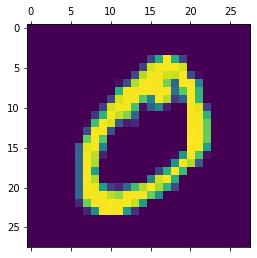

In [13]:
plt.matshow(X_train[1])

In [14]:
y_train[1]

0

In [15]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [16]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

13372
1


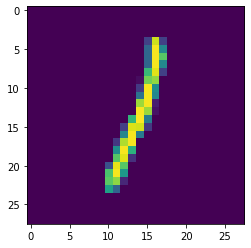

In [17]:
from random import randint

img_idx=randint(0,X_train.shape[0])
print(img_idx)
plt.imshow(X_train[img_idx])
print(y_train[img_idx])

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [21]:
X_train_flattened.shape

(60000, 784)

In [22]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input,Dense

In [25]:
ae_input=Input(shape=(784,))
ae_h1=Dense(64,activation='sigmoid')(ae_input)
ae_output=Dense(784,activation='sigmoid')(ae_h1)

In [26]:
ae_model=Model(ae_input,ae_output)

In [30]:
ae_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [32]:
ae_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [31]:
ae_model.fit(X_train_flattened,X_train_flattened,batch_size=32,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 6514.6152 - accuracy: 0.0137
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 6821.3223 - accuracy: 0.0134
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 7123.4570 - accuracy: 0.0122
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 7439.0347 - accuracy: 0.0137
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 7741.4658 - accuracy: 0.0138
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 8046.7290 - accuracy: 0.0135
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 8355.7959 - accuracy: 0.0136
Epoch 8/20
1875/1875 [==============================] - 8s 5ms/step - loss: 8656.8174 - accuracy: 0.0144
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 8970.3115 - accuracy: 0.0136
Epoch 10/20
1875/1875 [==============================] 